# Modelación de flujo de agua subterránea en un medio heterogéneo/Perfil

In [147]:
from __future__ import print_function
from fenics import *
import numpy as np
import random as ra
import sys

In [148]:
mesh= RectangleMesh(Point(0,0),Point(200,100),20,10)
V = FunctionSpace(mesh, 'P', 1)

In [149]:
# Se definen las condiciones de fronteras

u_S = Expression('100-0.45*x[0]', degree=1)

def frontera_S(x,frontera):
 tol=1E-14 
 if frontera:
  if abs(x[1]-100)<=tol: 
   return True
  else:
   return False 
 else:
  return False  


F_S = DirichletBC(V,u_S, frontera_S)
bc = [F_S]

In [150]:
# Se define la heterogeneidad

class K(UserExpression):
 def set_k_values(self, k_0, k_1):
     self.k_0, self.k_1 = k_0, k_1
 def eval(self, value, x):
   tol = 1E-14 
   if  x[1] <= 50 + tol:
      value[0] = self.k_0
   else:
      value[0] = self.k_1

kappa = K(degree=1)
kappa.set_k_values(100,10)

In [151]:
#Se define el problema variacional

u=TrialFunction(V)
v=TestFunction(V)
f=Constant(0)
a=kappa*dot(grad(u),grad(v))*dx
g=Constant(0)
L=f*v*dx-g*v*ds

In [152]:
# Se realiza el calculo de la solucion

u= Function(V)
solve(a==L,u,bc)


In [153]:
# Se organizan los valores para la exportación de los datos

tau=project(grad(u))
xx=np.loadtxt("Coordenadascentroide.csv",delimiter=',',skiprows=1,usecols=[1])
yy=np.loadtxt("Coordenadascentroide.csv",delimiter=',',skiprows=1,usecols=[2])
datos=np.zeros((400,7))
datos[:,0]=xx
datos[:,1]=yy

for i in range(0,399):
 datos[i,2]=tau(xx[i],yy[i])[0]
 datos[i,3]=tau(xx[i],yy[i])[1]

for i in range (0,399): 
 if (datos[i,1]<50):
  datos[i,4]=100
 else:
  datos[i,4]=10


In [154]:
#Se exportan los datos de la carga hidráulica

carga=np.zeros([101,201])
for i in range (0,201):
 for j in range (0,101):
    carga[j,i]=u(i,j)

np.savetxt("carga1.2",carga)


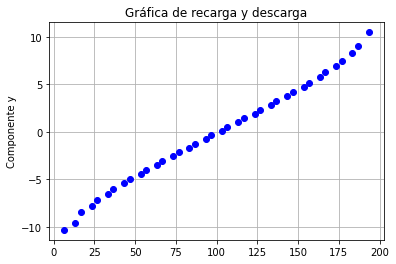

In [155]:
# Se aplica la ecuación de Darcy para obtener el flujo q=k*grad(u); donde k=datos[:,4] y grad(u)=(datos[:,2] y datos[:,3])
datos[:,5]=-1*datos[:,4]*datos[:,2]
datos[:,6]=-1*datos[:,4]*datos[:,3]
  

np.savetxt("SoluciónFlujo3.4",datos)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(datos[361:399,0],datos[361:399,6],'bo')
plt.title('Gráfica de recarga y descarga')
plt.ylabel('Componente y')
plt.grid()

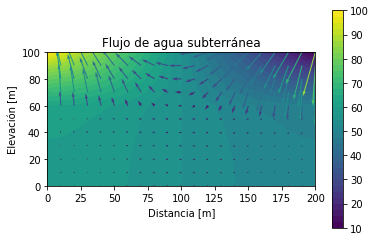

In [156]:
# Ploteo de la solucion
plt.figure()
carga=plot(u)
plot(grad(u))
#flujo=plt.quiver(xx,yy,datos[:,5],datos[:,6])
plt.colorbar(carga)
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
#plt.colorbar(im)
#plot(mesh)
plt.title('Flujo de agua subterránea')
plt.ylabel('Elevación [m]')
plt.xlabel('Distancia [m]')
plt.show()